In [1]:
import spacy #imports Spacy library
nlp = spacy.load("en_core_web_sm")
doc = nlp("The single biggest problem in communication is the illusion that it has taken place. - George Bernard Shaw") #text to analyze

#Loop through each word and print the part of speech
for token in doc:
    print(token.text,token.pos_)

The DET
single ADJ
biggest ADJ
problem NOUN
in ADP
communication NOUN
is AUX
the DET
illusion NOUN
that SCONJ
it PRON
has AUX
taken VERB
place NOUN
. PUNCT
- PUNCT
George PROPN
Bernard PROPN
Shaw PROPN


In [2]:
doc = nlp('John is buying U.K. startup for $1 billon.')

#for each named entity, print the entity and type
for ent in doc.ents:
    print(ent.text, ent.label_)

John PERSON
U.K. GPE
$1 MONEY


In [3]:
from spacy import displacy #import spacy's visualizer library
displacy.render(doc, style='ent') #visualize the named entities inline with text.

In [4]:
import io #import Python's io library
ff = io.open('/kaggle/input/2016ws/2016WS.txt', 'r', errors='ignore') #open text version of Wiki article
doc = nlp(ff.read()) #read text file
ff.close() #close after reading

In [5]:
for ent in doc.ents:
    displacy.render(ent, style='ent') #display the named entities discovered in the Wiki article.

In [6]:
for ent in doc.ents:
    if ent.label_ == 'PERSON': #only print named entities that are 'PERSON' type
        displacy.render(ent, style='ent')

In [7]:
WS_names = [] #Create a list to use for storing names from the Wiki article
for ent in doc.ents:
    if ent.label_ == 'PERSON':
        WS_names.append(str(ent)) #add each discovered name to the list
        
sorted_list = sorted(WS_names, key=str) #sorts the list

from collections import Counter #import the counter object from the collection module
import numpy as np #import numpy for better array options

new_list = np.asarray(Counter(sorted_list).most_common(20)) #create a new list that stores an array containing the top 20 most common names

print(new_list) #show the results

[['Ben Zobrist' '11']
 ['Anthony Rizzo' '10']
 ['Jason Kipnis' '9']
 ['Kris Bryant' '9']
 ['Corey Kluber' '8']
 ['Dexter Fowler' '8']
 ['Terry Francona' '8']
 ['Zobrist' '8']
 ['Aroldis Chapman' '7']
 ['David Ross' '7']
 ['Jake Arrieta' '7']
 ['Joe Maddon' '7']
 ['Jon Lester' '7']
 ['Rizzo' '7']
 ['Addison Russell' '6']
 ['Andrew Miller' '6']
 ['Carrie' '6']
 ['Kluber' '6']
 ['Mike Montgomery' '6']
 ['Muskat' '6']]


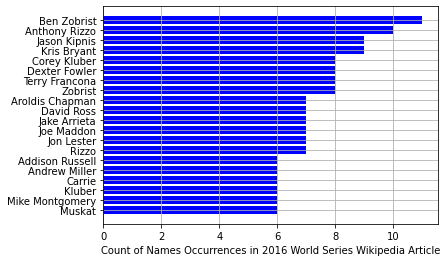

In [8]:
import matplotlib.pyplot as plt #import the matplot library to create a chart visual

#settings for a horizontal bar chart
fig, ax = plt.subplots()
plt.barh(new_list[:,0], [int(x) for x in new_list[:,1]], color = 'blue', align = 'center')
ax.invert_yaxis()
ax.set_xlabel('Count of Names Occurrences in 2016 World Series Wikipedia Article')
ax.grid()

plt.show()